In [1]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Model imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Splitting and hyperparameter tuning imports
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# metrics imports
from sklearn.metrics import classification_report, accuracy_score,plot_roc_curve,confusion_matrix

<h3>Week 1: Data Exploration

In [2]:
dataset = pd.read_csv('health care diabetes.csv')

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


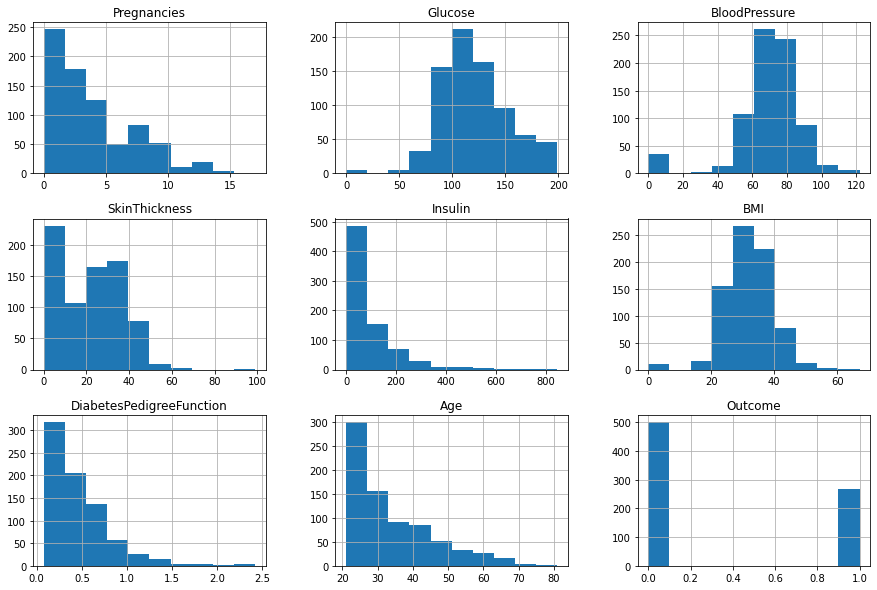

In [7]:
dataset.hist(figsize=(15,10))
plt.show()

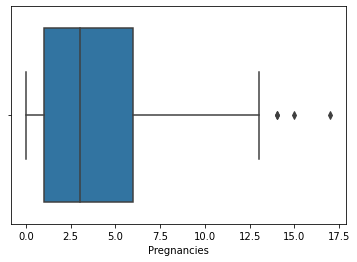

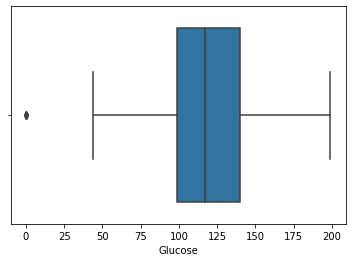

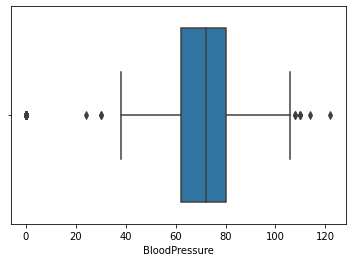

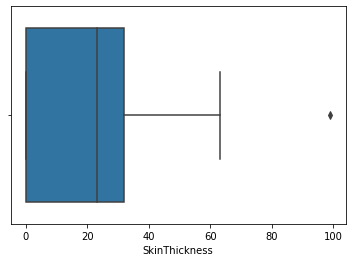

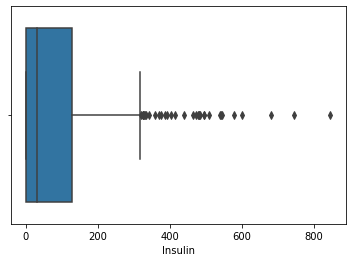

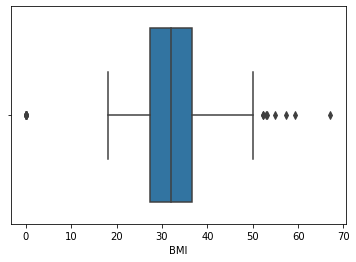

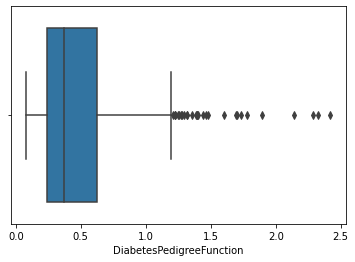

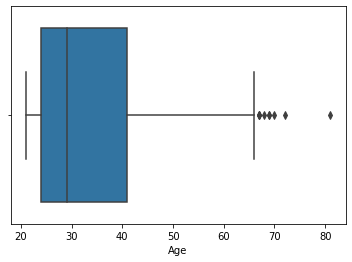

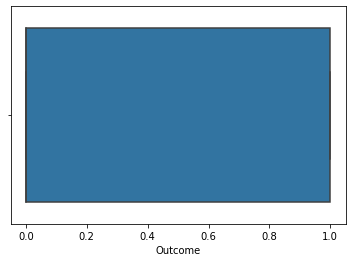

In [10]:
for column in dataset.columns:
    sns.boxplot(dataset[column])
    plt.show()

We can see there are lots of outliers. But, let's first treat missing values then we can check how the plots look.

In [11]:
dataset[dataset['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [12]:
dataset[dataset['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [13]:
dataset[dataset['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [14]:
dataset[dataset['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
dataset[dataset['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


As per problem statement, a value of 0 on the above fields does not make sense and indicates missing value. Also, we have only 768 records and hence can't go with removing null values. In this case, what we can do is go with average of values or median of values. We can group all data with respect to age and proceed.

In [16]:
dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dataset[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [17]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


We have just 768 records so can't remove the records.
To remove null values, we can proceed in two ways:
1. Just take mean of columns and not do any groupings
2. Go ahead with the same grouping by age groups and replace the final NaN values with mean of dataset.

In this case, we will go ahead with the second method

In [18]:
dataset['Insulin'] = dataset.groupby(['Age'])['Insulin'].apply(lambda x: x.fillna(x.mean()))
dataset['Glucose'] = dataset.groupby(['Age'])['Glucose'].apply(lambda x: x.fillna(x.mean()))
dataset['BloodPressure'] = dataset.groupby(['Age'])['BloodPressure'].apply(lambda x: x.fillna(x.mean()))
dataset['SkinThickness'] = dataset.groupby(['Age'])['SkinThickness'].apply(lambda x: x.fillna(x.mean()))
dataset['BMI'] = dataset.groupby(['Age'])['BMI'].apply(lambda x: x.fillna(x.mean()))

In [19]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,105.500000,33.6,0.627,50,1
1,1,85.0,66.0,29.0,222.333333,26.6,0.351,31,0
2,8,183.0,64.0,29.1,95.500000,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


In [20]:
dataset.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                1
SkinThickness               12
Insulin                     20
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

Here again, we see that there are few records that are not populated. The possible reason is that the age group had all NaN records and hence, it's still NaN. We'll go ahead with taking mean value of that column.

In [21]:
final_dataset = dataset.copy()

In [22]:
final_dataset.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                1
SkinThickness               12
Insulin                     20
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [23]:
final_dataset['BloodPressure'] = final_dataset['BloodPressure'].replace(np.nan,np.mean(final_dataset['BloodPressure']))
final_dataset['SkinThickness'] = final_dataset['SkinThickness'].replace(np.nan,np.mean(final_dataset['SkinThickness']))
final_dataset['Insulin'] = final_dataset['Insulin'].replace(np.nan,np.mean(final_dataset['Insulin']))

In [24]:
final_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<h3>Week 2: Data Exploration

Now, let's check the balance in data

Text(0.5, 1.0, 'Count of outcomes by values')

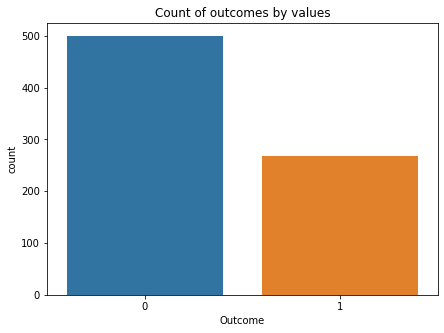

In [31]:
plt.figure(figsize=(7,5))
sns.countplot(final_dataset['Outcome'])
plt.title('Count of outcomes by values')

We can see our data is not imbalanced. So, we can proceed with usual steps.

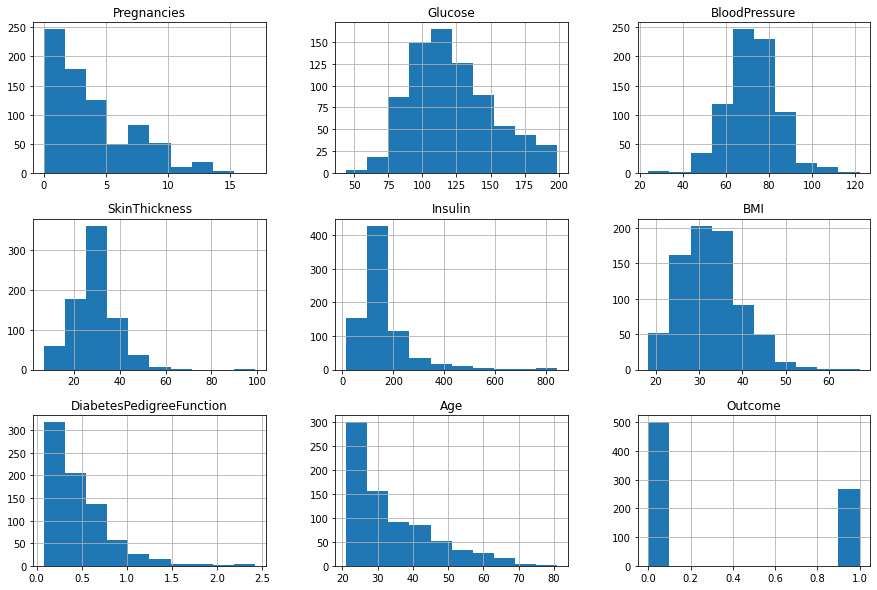

In [25]:
final_dataset.hist(figsize=(15,10))
plt.show()

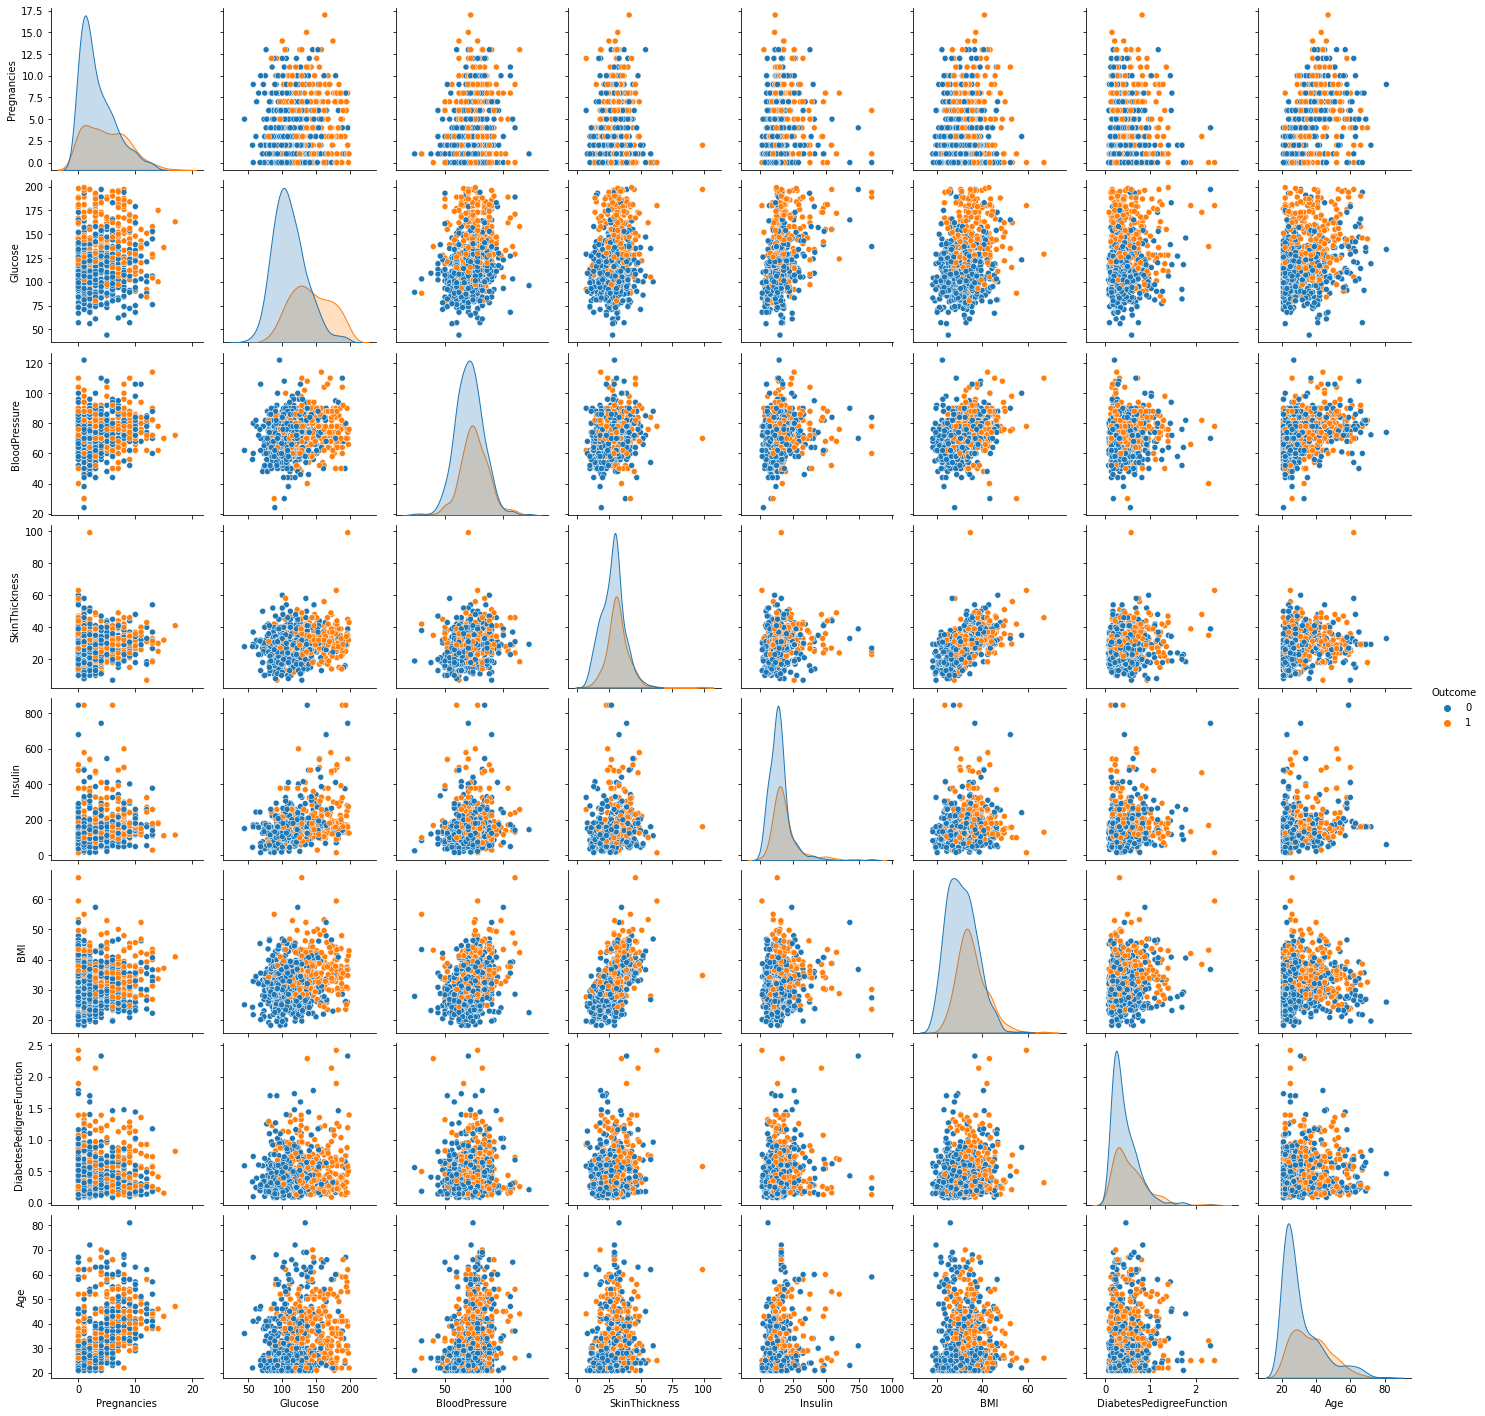

In [26]:
sns.pairplot(data=final_dataset,hue='Outcome')

Let's plot a heatmap to see relationship between variables

In [27]:
correlation_dataset = final_dataset.corr()

<AxesSubplot:>

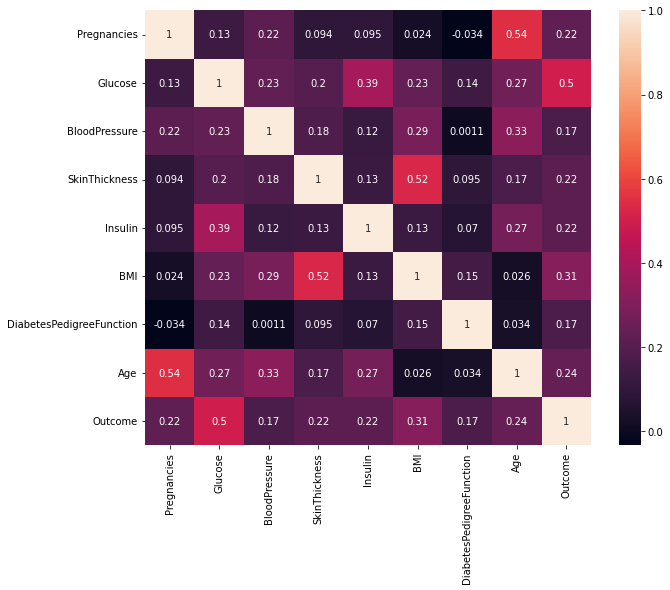

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_dataset,annot=True)

As per observations from heatmap and correlation coefficient, values closer to 1 means variables are strongly related to each other. Similary, lower correlation coefficient means variables are not related to each other.

From the above, we can infer the following:
1. Age and Pregnancies are strongly related to each other.
2. Glucose is directly related to Outcome i.e. as we know diabetes is caused due to excess sugar in blood. Hence, it is relevant that people with high glucose levels are more likely suffering from Diabetes while people with lower glucose levels are less likely suffering from Diabetes.
3. Also, continuing the above point, it is important to remember that Insulin is the main substance used to keep blood glucose levels from becoming too high.So, correlation between Insulin and Glucose is justified. 
But one point to note here is people who have diabetes might either have a resistance to the effects of insulin or might not produce insulin at all. Hence, the correlation coefficient of 0.22 between Insulin and Outcome is justified.
4. Few more observations we can make are BMI and Skin Thickness are strongly correlated with each other. Age and Blood Pressure, Age and Insulin, BMI and Blood Pressure, BMI and Glucose are also correlated with each other.

<h3>Week 3: Data Modelling

In [36]:
final_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,105.500000,33.6,0.627,50,1
1,1,85.0,66.0,29.0,222.333333,26.6,0.351,31,0
2,8,183.0,64.0,29.1,95.500000,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1


Now, for model building for predicting Diabetes, we can see this is a binary classification problem so we can use models like Logistic Regression, Decision Tree, Naive Bayes, Support Vector Machines, K Nearest Neighbours, and even ensemble methods like Random Forest and XGBoost.<br>

Before building model, we need to split data properly into training, validation and testing sets. We can use two methods for the same:
1. train_test_split: We can use this method but the accuracy will be different when we use different values for random_state.
2. cross_validation: we can go with cross-validation as this will split the data into different folds(3 folds in this case considering the data) and take average of accuracies. We will be using Stratified K-fold cross-validation for this problem

We will be taking accuracy scores of the model and will be comparing all models and then moving forward with making decision which model to finally go with.

Also, we are leaving parameters blank as of now. We will be applying hyperparameter tuning to models to see how better they can perform later.

In [37]:
kf = KFold(n_splits=3,shuffle=True)

In [38]:
features = final_dataset.drop(['Outcome'],axis=1)
target = final_dataset['Outcome']

<h3>Logistic Regression

In [39]:
logreg = LogisticRegression()
logistic_regression_score = cross_val_score(logreg,features,target,cv=3)
print(logistic_regression_score)

[0.7578125  0.75       0.78515625]


<h3>DecisionTree Classifier

In [40]:
dt_classifier = DecisionTreeClassifier()
decision_tree_score = cross_val_score(dt_classifier,features,target,cv=3)
print(decision_tree_score)

[0.69140625 0.7109375  0.69921875]


<h3>Multinomial Naive Bayes classifier

In [41]:
mnb_classifier = MultinomialNB()
naive_bayes_score = cross_val_score(mnb_classifier,features,target,cv=3)
print(naive_bayes_score)

[0.61328125 0.671875   0.625     ]


<h3>Support vector classifier

In [42]:
svc_classifier = SVC()
svc_score = cross_val_score(svc_classifier,features,target,cv=3)
print(svc_score)

[0.7421875  0.73828125 0.78125   ]


<h3>K Nearest Neighbours classifier

In [43]:
knn_classifier = KNeighborsClassifier()
knn_score = cross_val_score(knn_classifier,features,target,cv=3)
print(knn_score)

[0.6875     0.734375   0.73828125]


<h3>Random Forest Classifier

In [44]:
rfc_classifier = RandomForestClassifier()
rfc_score = cross_val_score(rfc_classifier,features,target,cv=3)
print(rfc_score)

[0.72265625 0.74609375 0.76953125]


<h3>XGBoost Classifier

In [45]:
xgb_classifier = XGBClassifier()
xgb_score = cross_val_score(xgb_classifier,features,target,cv=3)
print(xgb_score)

[12:53:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:53:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.74609375 0.75       0.75      ]


In [46]:
model_name = ['Logistic Regression','Decision Tree','Naive Bayes','Support Vector Machines','K Nearest Neigbours','Random Forest','XGBoost']
model_accuracy = [np.mean(logistic_regression_score),np.mean(decision_tree_score),np.mean(naive_bayes_score),np.mean(svc_score),np.mean(knn_score),np.mean(rfc_score),np.mean(xgb_score)]

In [47]:
df_accuracy = pd.DataFrame(zip(model_name,model_accuracy),columns=['Model Name','Accuracy'])
df_accuracy

,Model Name,Accuracy
0,Logistic Regression,0.764323
1,Decision Tree,0.700521
2,Naive Bayes,0.636719
3,Support Vector Machines,0.753906
4,K Nearest Neigbours,0.720052
5,Random Forest,0.746094
6,XGBoost,0.748698


We can see from above that Logistic Regression and Support vector machine have good accuracy. It was expected as this is a binary classification problem. Also, for KNN algorithm, the average accuracy is coming 72%.

Let's move forward with hyperparameter tuning of SVM, KNN, XGBoost and check if we have any major improvement. We will be doing hyperparameter tuning with RandomizedSearchCV.

Support Vector Machines

In [48]:
params_svm = {'kernel':['linear','rbf'],
          'C':[0.1,1,10,100],
          'gamma':['scale','auto']}

In [49]:
svm_rs = RandomizedSearchCV(svc_classifier,param_distributions=params_svm,n_jobs=-1,cv=3)
svm_rs.fit(features,target)

RandomizedSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']})

In [50]:
svm_rs.best_score_

0.7734375

In [51]:
svm_rs.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 100}

We can see there is a slight boost in Support Vector Machines and the parameters we need to pass for the same as above.

In [52]:
params_knn = {'leaf_size':list(range(1,50)),
          'n_neighbors':list(range(1,30)),
          'p':[1,2]}

In [53]:
knn_rs = RandomizedSearchCV(knn_classifier,param_distributions=params_knn,n_jobs=-1,cv=3)
knn_rs.fit(features,target)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'p': [1, 2]})

In [54]:
knn_rs.best_score_

0.74609375

In [55]:
knn_rs.best_params_

{'p': 2, 'n_neighbors': 26, 'leaf_size': 35}

We can see from the above that there is slight improvement in accuracy for K Nearest Neighbors classifier

In [56]:
params_xgb = {'n_estimators': [100, 200, 500],
              'learning_rate': [0.01,0.05,0.1],
              'booster': ['gbtree', 'gblinear'],
              'gamma': [0, 0.5, 1],
              'reg_alpha': [0, 0.5, 1],
              'reg_lambda': [0.5, 1, 5],
              'base_score': [0.2, 0.5, 1]}

In [57]:
xgb_rs = RandomizedSearchCV(xgb_classifier,param_distributions=params_xgb,n_jobs=-1,cv=3)
xgb_rs.fit(features,target)

[12:56:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                           

In [58]:
xgb_rs.best_score_

0.7669270833333334

In [59]:
xgb_rs.best_params_

{'reg_lambda': 0.5,
 'reg_alpha': 1,
 'n_estimators': 200,
 'learning_rate': 0.05,
 'gamma': 1,
 'booster': 'gbtree',
 'base_score': 0.5}

With XGBoost also we are getting similar improvement in scores.

Let's go ahead training our data with Logistic Regression model and check other performance metrics

In [74]:
final_model = LogisticRegression()

In [75]:
x_train,x_test,y_train,y_test = train_test_split(features,target)

In [76]:
final_model.fit(x_train,y_train)

LogisticRegression()

In [77]:
pred_target = final_model.predict(x_test)

In [78]:
print(accuracy_score(y_pred=pred_target,y_true=y_test))

0.7708333333333334


In [79]:
print(classification_report(y_pred=pred_target,y_true=y_test))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       122
           1       0.75      0.56      0.64        70

    accuracy                           0.77       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.77      0.77      0.76       192



From the above steps, we can see that we are getting an accuracy of 77%, while precision, recall, f1-score etc. are also looking good.
Now, important point to note here is that in most medical related problems, we should be focussing on recall and f1-score due to the below reason:
Say there are 100 patient records to be examined, 95 are diagnosed NO and 5 are diagnosed YES. Precision will show the exactness of the model i.e it can give model precision to be 95%. But, that is incorrect as it won't detect YES properly.
In this case, we can consider Recall which shows the completeness of the model.

In [80]:
print(confusion_matrix(y_true=y_test,y_pred=pred_target))

[[109  13]
 [ 31  39]]


Text(0.5, 1.0, 'AUC-ROC curve for final model')

<Figure size 576x576 with 0 Axes>

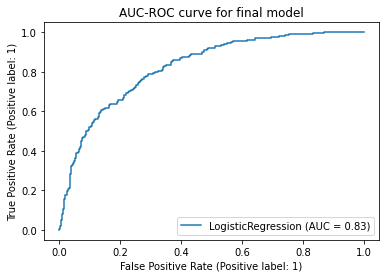

In [81]:
plt.figure(figsize=(8,8))
plot_roc_curve(estimator=final_model,X=features,y=target)
plt.title('AUC-ROC curve for final model')

AUC-ROC curve looks good as the area under ROC curve is good and optimal meaning our model is looking good. Hence, we can finalize this model.

Let's format and export the final dataset for plotting in Tableau and if we want we can save the model using pickle so it can be deployed in production.

In [84]:
data = final_dataset.copy()

In [88]:
data['Outcome'] = data['Outcome'].apply(lambda x:'Diabetic' if x==1 else 'Non-Diabetic')

In [89]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,105.500000,33.6,0.627,50,Diabetic
1,1,85.0,66.0,29.0,222.333333,26.6,0.351,31,Non-Diabetic
2,8,183.0,64.0,29.1,95.500000,23.3,0.672,32,Diabetic
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,Non-Diabetic
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,Diabetic


In [90]:
# Saving dataset
data.to_csv('final_dataset.csv')

<h1>END